In [16]:
%matplotlib inline
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
footprint = hp.read_map('/nfs/slac/g/ki/ki23/des/jderose/SkyFactory/chinchilla-herd/Chinchilla-1/sampleselection/y1a1_gold_1.0.2_wide_footprint_4096.fits.gz')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
badmask = hp.read_map('/nfs/slac/g/ki/ki23/des/jderose/SkyFactory/chinchilla-herd/Chinchilla-1/sampleselection/y1a1_gold_1.0.2_wide_badmask_4096.fits.gz')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [4]:
nodup = hp.read_map('/nfs/slac/des/fs1/g/sims/jderose/addgals/catalogs/Buzzard/Catalog_v1.1/depthmaps/nodup_ssmask.fits')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:315: UserWarning: No ORDERING keyword in header file : assume RING
  "assume %s"%ordering)
/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:343: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


In [5]:
mask_lss = (footprint >= 1) * (badmask == 0) * (nodup != -9999)

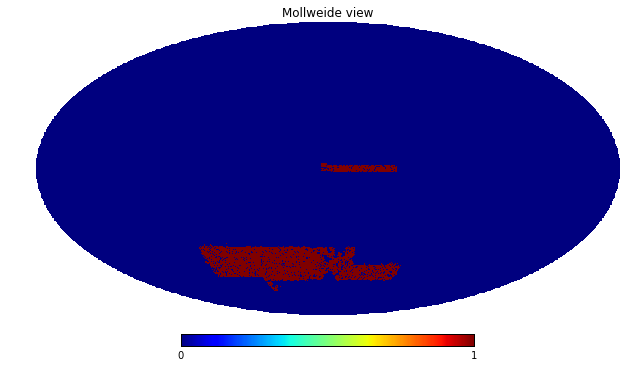

In [23]:
hp.mollview(mask_lss)

In [17]:
np.sum(mask_lss)

7412250

In [6]:
from astropy.io import fits
mock = 1
gold = fits.getdata('/nfs/slac/des/fs1/g/sims/jderose/addgals/catalogs/Buzzard/Catalog_v1.1/y1a1_mock_analysis/mock{0}/mergedcats/Buzzard_v1.1_{0}_gold.fits.gz'.format(mock))

In [7]:
gold.columns

ColDefs(
    name = 'coadd_objects_id'; format = 'K'
    name = 'ra'; format = 'E'
    name = 'dec'; format = 'E'
    name = 'redshift'; format = 'E'
    name = 'flags_badregion'; format = 'K'
    name = 'flags_gold'; format = 'K'
    name = 'hpix'; format = 'K'
    name = 'sample'; format = 'K'
)

In [36]:
print len(mask_lss)
np.where(mask_lss == 1)

201326592


(array([ 96247825,  96247826,  96247827, ..., 193617232, 193617233,
        193617234]),)

In [37]:
from make_data_randoms import index_to_radec, radec_to_index
dec, ra = index_to_radec(np.where(mask_lss == 1),4096)

In [48]:
dec = dec[0]
ra = ra[0]

In [56]:
ra2 = ra[ra<100]
dec2 = dec[ra<100]
ra2 = ra2[dec2<-40]
dec2 = dec2[dec2<-40]

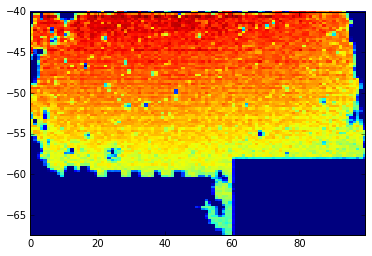

In [57]:
plt.hist2d(ra2,dec2,bins=100);

<matplotlib.colorbar.Colorbar instance at 0x7f0f32f2a908>

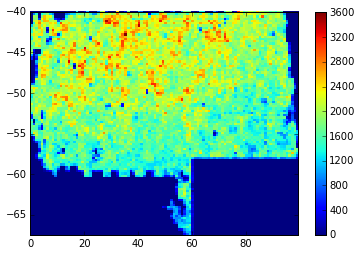

In [19]:
plt.hist2d(gold['ra'],gold['dec'],bins=100);
plt.colorbar()

In [ ]:
lss = flock[(flock['SAMPLE'] == 1) + (flock['SAMPLE'] == 3)]
# filter based on lss mask
conds_lss = mask_lss[lss['HPIX']]
lss = lss[conds_lss]